# <font color=red>Baseline</font> on Diabetes Data<br/>(Classification Model)

In this program we work on __classification model__ and just create a __baseline__ considering all the features present in the original dataset. Later, we apply various other techniques viz., __Variance Thresholding, Chisquare test, ANOVA, Mutual Information__ to fetch only the __significant features__ from the complete collection; train and test to see if there is any improvement.

<img src='../Preparing Data for Machine Learning/Data/Filter Methods.png' width=500/>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
diabetes = pd.read_csv('Data/pima-indians-diabetes.data.csv')
diabetes.head(10)

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes.dtypes

Pregnancies         int64
Glucose             int64
BP                  int64
Skin Thickness      int64
Insulin             int64
Mass              float64
Pedigree          float64
Age                 int64
class               int64
dtype: object

Exploratory Data Analysis

Let us watch for any patterns, correlations between features. If two features are highly correlated we can remove one of them to reduce the number of features we have.

Text(0, 0.5, 'Plasma glucose concentration after 2 hours')

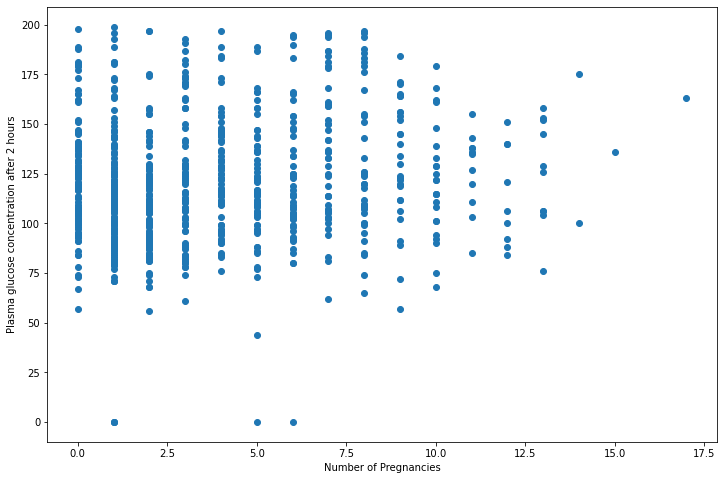

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diabetes['Pregnancies'], diabetes['Glucose'])
plt.xlabel('Number of Pregnancies')
plt.ylabel('Plasma glucose concentration after 2 hours')

Observations:
- Hard to find any remarkable patterns

Text(0, 0.5, 'Diastolic blood pressure (mm Hg)')

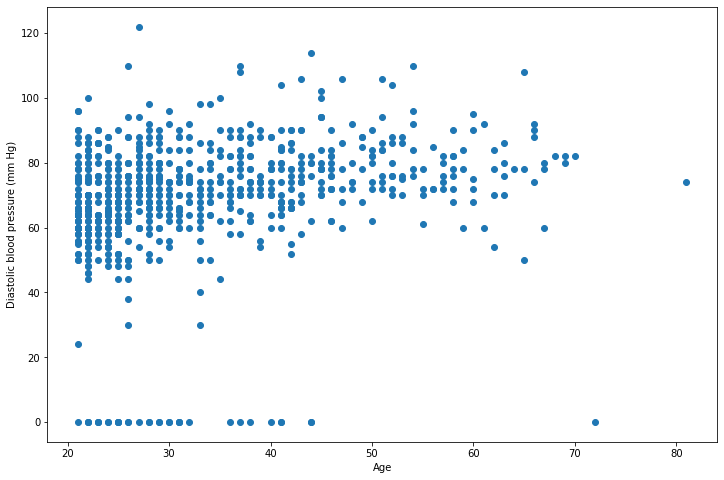

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diabetes['Age'], diabetes['BP'])
plt.xlabel('Age')
plt.ylabel('Diastolic blood pressure (mm Hg)')

Observations:
- No obvious patterns

Text(0, 0.5, 'Diabetic or not')

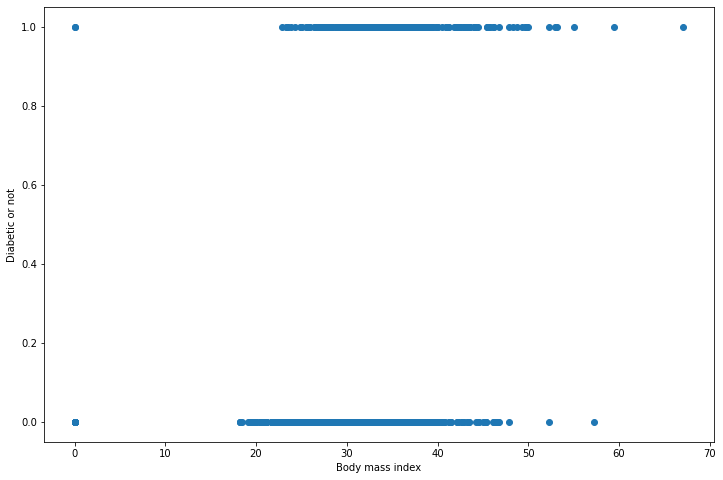

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diabetes['Mass'], diabetes['class'])
plt.xlabel('Body mass index')
plt.ylabel('Diabetic or not')

Observations:
- Seems the diabetic patients have more weight

In [9]:
diabetes_corr = diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Observations:
- Pregnancies, Glucose appear to have influence on diabetic or not

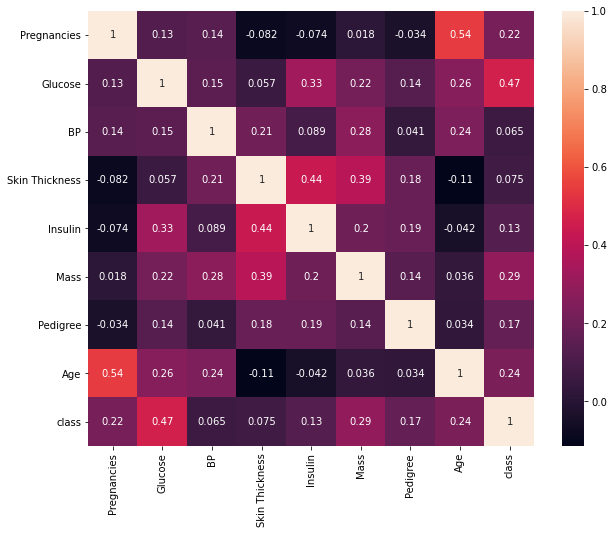

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(diabetes_corr, annot=True)

Observations:
- Pregnancies and Age are +vely correlated
- Glucose and Insulin are +vely correlated

Let us establish a __baseline model__ keeping all the features and reduce them later.

In [11]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('class', axis=1)
Y = diabetes['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
print('train x shape, ', x_train.shape)
print('train y shape, ', y_train.shape)

train x shape,  (614, 8)
train y shape,  (614,)


In [13]:
print('test x shape, ', x_test.shape)
print('test y shape, ', y_test.shape)

test x shape,  (154, 8)
test y shape,  (154,)


Let us use the 'liblinear' LogisticRegression, which is suitable for small dataset:

In [14]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='liblinear')

In [15]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(classifier.coef_)

[[ 1.36538231e-01  2.53531357e-02 -1.60336750e-02  2.88635803e-03
  -1.12404674e-03  6.06685097e-02  7.87036401e-01 -5.19033660e-04]]


In [17]:
y_pred = classifier.predict(x_test)

In [18]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
21,0,0
31,1,1
111,1,1
447,0,0
274,0,1


Check the model performance using the __Confusion Matrix__

In [19]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
diabetes_crosstab

y_test,0,1
y_pred,,
0,89,20
1,13,32


Better way to look at the performance of the model is to use __metrics__:

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy_score = ', acc)
print('precision_score = ', prec)
print('recall_score = ', recall)

accuracy_score =  0.7857142857142857
precision_score =  0.7111111111111111
recall_score =  0.6153846153846154
